## Basic setup

In [1]:
import uproot
import numpy as np
import pandas as pd
import awkward as ak

#plots
import matplotlib.pyplot as plt
import SBNDstyle
plt.style.use('SBND.mplstyle')
import math

import pandas as pd

import sys
import gdown

print("python version:", sys.version)
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)

python version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Pandas version: 2.1.4
Numpy version: 1.26.2


In [16]:
#si esta celda no te funcionam, solo tienes que bajar los datos de mi Google drive a mano: https://drive.google.com/drive/folders/1fDK8mG9Da0R0ZV4auc8vYDBthoRSuQjx?usp=sharing

url = 'https://drive.google.com/uc?id='

#datos señal
id_35MeV ="1SBj7nH7WQA2d5pjRCrIpSdAVbkUyxCPu"
id_10MeV ="1w4LL7R3TroXG1nNT65GAcRnlSkLWW_aO"
id_100MeV="1S5JjV4O0ufTx-GpGgikCcRZ69J1ACjg4"

#datos fondo
id_intime_cosmics="1tWHMRAS2BtH42uL77PXrbEb4cC3K2qzP" #muones de cosmicos
id_nus_inclusive="1ikOESTKSdSwOsN2gP2QXtEwWEAdLWNqA" #neutrinos del modelo estandar, todos

#canales menos presentes, pero que son el principal fondo que "replica" la señal, dos showers(pi0) o 
# una shower(ccnue) cuando no reconstuyes bien o las dos showers van tan pegadas que no las distingues/separas
id_pi0="1QCXi5eY3rF7-6nAJDKBqd6tPScULk7PW"
id_ccnue="1pPQGyhH_EcvOy8s-8zz9GfMWPtnysvg3"

HNL_35="HNL_35MeV_50k_PROCCESSED_pyPROCCESSED.root"
HNL_10="HNL_10MeV_50k_PROCCESSED_pyPROCCESSED.root"
HNL_100="HNL_100MeV_50k_PROCCESSED_pyPROCCESSED.root"
NUS_file="rockbox_500k_PROCCESSED_pyPROCCESSED.root"
COS_file="intime_cosmics_110k_PROCCESSED_pyPROCCESSED.root"
PI0_file="pi0_130k_PROCCESSED_pyPROCCESSED.root"
CCNUE_file="ccnue_33k_PROCCESSED_pyPROCCESSED.root"

ids=[
    id_35MeV,
    id_10MeV,
    id_100MeV,
    id_intime_cosmics,
    id_nus_inclusive,
    id_pi0,
    id_ccnue]

files=[
    HNL_35,
    HNL_10,
    HNL_100,
    COS_file,
    NUS_file,
    PI0_file,
    CCNUE_file]

for id, file in zip(ids,files):
    print("Downloading",file)
    gdown.download(url+id,file,quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1SBj7nH7WQA2d5pjRCrIpSdAVbkUyxCPu
To: /home/rodrigoa/HNL/AlbertoDataset100MeVs/HNL_35MeV_50k_PROCCESSED_pyPROCCESSED.root
100%|██████████| 7.60M/7.60M [00:00<00:00, 59.2MB/s]


Downloading...
From: https://drive.google.com/uc?id=1w4LL7R3TroXG1nNT65GAcRnlSkLWW_aO
To: /home/rodrigoa/HNL/AlbertoDataset100MeVs/HNL_10MeV_50k_PROCCESSED_pyPROCCESSED.root
100%|██████████| 7.82M/7.82M [00:00<00:00, 42.3MB/s]


Downloading...
From: https://drive.google.com/uc?id=1S5JjV4O0ufTx-GpGgikCcRZ69J1ACjg4
To: /home/rodrigoa/HNL/AlbertoDataset100MeVs/HNL_100MeV_50k_PROCCESSED_pyPROCCESSED.root
100%|██████████| 7.43M/7.43M [00:00<00:00, 33.2MB/s]


Downloading...
From: https://drive.google.com/uc?id=1tWHMRAS2BtH42uL77PXrbEb4cC3K2qzP
To: /home/rodrigoa/HNL/AlbertoDataset100MeVs/intime_cosmics_110k_PROCCESSED_pyPROCCESSED.root
100%|██████████| 1.06M/1.06M [00:00<00:00, 7.70MB/s]


Downloading...
From: https://drive.google.com/uc?id=1ikOESTKSdSwOsN2gP2QXtEwWEAdLWNqA
To: /home/rodrigoa/HNL/AlbertoDataset100MeVs/rockbox_500k_PROCCESSED_pyPROCCESSED.root
100%|██████████| 70.1M/70.1M [00:01<00:00, 62.3MB/s]


Downloading...
From: https://drive.google.com/uc?id=1QCXi5eY3rF7-6nAJDKBqd6tPScULk7PW
To: /home/rodrigoa/HNL/AlbertoDataset100MeVs/pi0_130k_PROCCESSED_pyPROCCESSED.root
100%|██████████| 20.0M/20.0M [00:00<00:00, 59.2MB/s]


Downloading...
From: https://drive.google.com/uc?id=1pPQGyhH_EcvOy8s-8zz9GfMWPtnysvg3
To: /home/rodrigoa/HNL/AlbertoDataset100MeVs/ccnue_33k_PROCCESSED_pyPROCCESSED.root
100%|██████████| 6.04M/6.04M [00:00<00:00, 27.1MB/s]


In [2]:
from aux_functions import *

HNL_file="HNL_35MeV_50k_PROCCESSED_pyPROCCESSED.root"
HNL_file="HNL_150MeV_50k_PROCCESSED_pyPROCCESSED.root"
HNL_file="HNL_100MeV_50k_PROCCESSED_pyPROCCESSED.root"


NUS_file  ="rockbox_500k_PROCCESSED_pyPROCCESSED.root"
COS_file  ="intime_cosmics_110k_PROCCESSED_pyPROCCESSED.root"
PI0_file  ="pi0_130k_PROCCESSED_pyPROCCESSED.root"
CCNUE_file="ccnue_33k_PROCCESSED_pyPROCCESSED.root"



globals_nus     = file_globals(NUS_file     ,file_type="nu")
globals_cosmics = file_globals(COS_file,file_type="cosmics")
globals_hnl     = file_globals(HNL_file         ,file_type="hnl")
globals_pi0     = file_globals(PI0_file         ,file_type="pi0")
globals_ccnue   = file_globals(CCNUE_file       ,file_type="ccnue")
cosmics_reescale(globals_cosmics,globals_nus,globals_nus)

print("POTs scaling HNL:   ",globals_hnl["POTs_scaling"])
print("POTs scaling NUS:   ",globals_nus["POTs_scaling"])
print("POTs scaling COS:   ",globals_cosmics["POTs_scaling"])
print("POTs scaling PI0:   ",globals_pi0["POTs_scaling"])
print("POTs scaling CCNUE: ",globals_ccnue["POTs_scaling"])


#Prepare signal and background dataframes
file_path = "event_branches.txt"
with open(file_path, "r") as file:
    array_of_strings = file.readlines()
branches = [string.strip() for string in array_of_strings]

signal=uproot.open(HNL_file)["hnlana/events"]
signal_df = pd.DataFrame()

bckg_SM=uproot.open(NUS_file)["hnlana/events"]
bckg_SM_df = pd.DataFrame()

bckg_cosmics=uproot.open(COS_file)["hnlana/events"]
bckg_cosmics_df = pd.DataFrame()

bckg_pi0=uproot.open(PI0_file)["hnlana/events"]
bckg_pi0_df = pd.DataFrame()

bckg_ccnue=uproot.open(CCNUE_file)["hnlana/events"]
bckg_ccnue_df = pd.DataFrame()

for df,tree in zip([signal_df,bckg_SM_df,bckg_cosmics_df,bckg_pi0_df,bckg_ccnue_df],[signal,bckg_SM,bckg_cosmics,bckg_pi0,bckg_ccnue]):
# for df,tree in zip([signal_df,bckg_SM_df,bckg_pi0_df,bckg_ccnue_df],[signal,bckg_SM,bckg_pi0,bckg_ccnue]):
    for branch in branches:
        df[branch] = np.array((tree[branch].array()))

for df, pots in zip([signal_df,bckg_SM_df,bckg_cosmics_df,bckg_pi0_df,bckg_ccnue_df],[globals_hnl['POTs_scaling'],globals_nus['POTs_scaling'],globals_cosmics['POTs_scaling'],globals_pi0['POTs_scaling'],globals_ccnue['POTs_scaling']]):
# for df, pots in zip([signal_df,bckg_SM_df,bckg_pi0_df,bckg_ccnue_df],[globals_hnl['POTs_scaling'],globals_nus['POTs_scaling'],globals_pi0['POTs_scaling'],globals_ccnue['POTs_scaling']]):
    df['weights'] = pots
    
#remove pi0 events from SM background, then add pi0 sample to SM background
bckg_SM_df  = bckg_SM_df  [bckg_SM_df ['slc_true_event_type']!=3]#remove pi0s
bckg_pi0_df = bckg_pi0_df [bckg_pi0_df['slc_true_event_type']==3]#only keep pi0s, in case there are minor events from other types

#remove ccnue events from SM background, then add ccnue sample to SM background
bckg_SM_df    = bckg_SM_df    [bckg_SM_df ['slc_true_event_type']!=6]#remove ccnue
bckg_ccnue_df = bckg_ccnue_df [bckg_ccnue_df['slc_true_event_type']==6]#only keep ccnue, in case there are minor events from other types

bckg_SM_df = pd.concat([bckg_SM_df,bckg_pi0_df,bckg_ccnue_df],ignore_index=True)


#set all signal events to slc_true_event_type = 0
signal_df['slc_true_event_type'][signal_df['slc_true_event_type']==1]=0; 

# #remove cosmics from signal sample (will be taken into account later)
signal_df = signal_df[signal_df['slc_true_event_type']!=9]


# plt.hist(bckg_SM_df["slc_true_event_type"], bins=range(9),weights=bckg_SM_df["weights"], align='left',histtype='step')

bckg_SM_df = pd.concat([bckg_SM_df,bckg_pi0_df,bckg_ccnue_df],ignore_index=True)
# plt.hist(bckg_SM_df["slc_true_event_type"], bins=range(9),weights=bckg_SM_df["weights"], align='left',histtype='step')
# plt.semilogy()

-----------------------------------------------
target total spill = 200000000.0
hnl + nu spill = 820000
target intime spill = 67209588.86924964
scale pot factor = 7.0009988405468375
-----------------------------------------------
POTs scaling HNL:    0.11273521278615192
POTs scaling NUS:    22.16498266245207
POTs scaling COS:    7.0009988405468375
POTs scaling PI0:    4.915479861577587
POTs scaling CCNUE:  1.3160456677155872


/tmp/ipykernel_132995/972075682.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal_df['slc_true_event_type'][signal_df['slc_true_event_type']==1]=0;


In [3]:
# prepare data in apropiate format: Pandas DataFrame


Start_size = signal_df.shape[0]
dfs_dict = {"signal": signal_df, "bckg": bckg_SM_df, "bckg_cosmic": bckg_cosmics_df}
# dfs_dict = {"signal": signal_df, "bckg": bckg_SM_df}

for df in dfs_dict.keys():
    
    #This should be done in the pre-processing
    
    dfs_dict[df]["slc_opt0_time_corrected_Z_pandora"]=(dfs_dict[df]["slc_opt0_time_corrected_Z_pandora"].array*1000)%18.936
    
    ##Minimal CUTs (prob should be done in the pre-processing too)
    # dfs_dict[df] = dfs_dict[df] [(dfs_dict[df]["slc_n_shws"] > 0)*(dfs_dict[df]["slc_n_shws"] < 3)]
    dfs_dict[df] = dfs_dict[df] [(dfs_dict[df]["slc_opt0_time"] >.3 )*(dfs_dict[df]["slc_opt0_time"] <2 )]
    dfs_dict[df] = dfs_dict[df] [(dfs_dict[df]["slc_is_fv"] )]

    
    var=(
    dfs_dict[df]["slc_n_primary_razzle_photons"]+

    dfs_dict[df]["slc_n_primary_razzle_electrons"]-
    dfs_dict[df]["slc_n_primary_dazzle_muons"]-
    dfs_dict[df]["slc_n_primary_dazzle_pions"]-
    dfs_dict[df]["slc_n_primary_dazzle_protons"]
    )
    dfs_dict[df]["slc_razzle_dazzle_combined"]=var

    var=(
    dfs_dict[df]["slc_n_razzled_photons"]+
    dfs_dict[df]["slc_n_razzled_electrons"]-
    dfs_dict[df]["slc_n_razzled_muons"]-
    dfs_dict[df]["slc_n_razzled_pions"]-
    dfs_dict[df]["slc_n_razzled_protons"]
    )
    dfs_dict[df]["slc_razzled_combined"]=var

    thresold=1e10 #maxPEs below sane value
    
    dfs_dict[df]["slc_opt0_measPE"][dfs_dict[df]["slc_opt0_measPE"]>thresold]=-1
    
    nan_values = dfs_dict[df]["slc_opt0_frac"].isna()
    dfs_dict[df]["slc_opt0_frac"].fillna(1, inplace=True)


    print(df)





signal_df=dfs_dict["signal"]
bckg_df=dfs_dict["bckg"]
bckg_df_cosmic=dfs_dict["bckg_cosmic"]

# signal_0cosmics_df=dfs_dict["signal_0cosmics"]

Size_sample = 12000
#if there were many   bckg events
# bckg_df = bckg_df.head(Size_sample)
#if there were many signal events
# signal_df = signal_df.head(Size_sample)

print("Signal")
print(Start_size, signal_df.shape[0], signal_df.shape[0]/Start_size*100, "%")


print("Background: SM")
print(bckg_df.shape)

print("Background: cosmic")
print(bckg_df_cosmic.shape)

background_df = bckg_df
background_df = pd.concat([bckg_df, bckg_df_cosmic])
# print("Background: SM + cosmic")
# print(background_df.shape)

/tmp/ipykernel_132995/1636298105.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_dict[df]["slc_opt0_measPE"][dfs_dict[df]["slc_opt0_measPE"]>thresold]=-1


signal
bckg
bckg_cosmic
Signal
40741 28549 70.07437225399474 %
Background: SM
(373673, 77)
Background: cosmic
(2568, 77)


/tmp/ipykernel_132995/1636298105.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_dict[df]["slc_opt0_measPE"][dfs_dict[df]["slc_opt0_measPE"]>thresold]=-1
/tmp/ipykernel_132995/1636298105.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_dict[df]["slc_opt0_measPE"][dfs_dict[df]["slc_opt0_measPE"]>thresold]=-1


## Test plot

[]

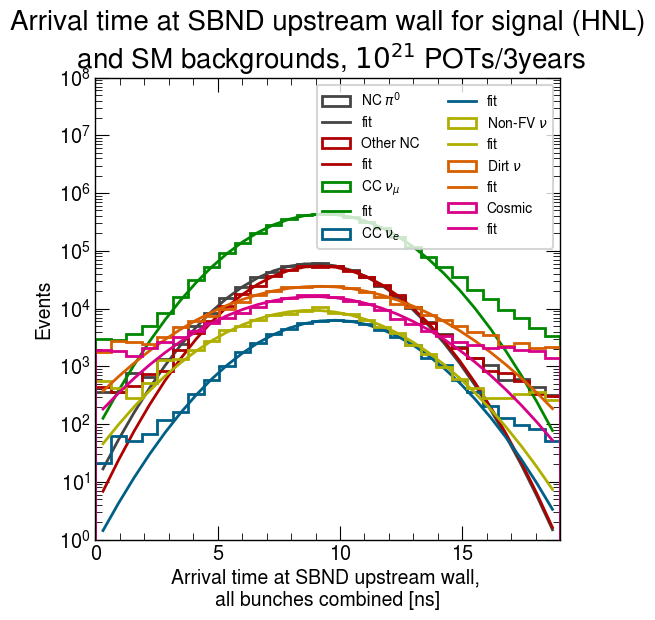

In [4]:
#Podemos plotear variables, por ejemplo, el timing

#stole from ATLAS color cycle
c1 = '#444444'
# c2 = '#e4e4e4'
c3 = '#af0000'
c4 = '#008700'
c5 = '#005f87'
c6 = '#afaf00'
c7 = '#d75f00'
c8 = '#d70087'
c9 = '#8700af'
c10 = '#0087af'
c11 = '#5f7800'
c12 = '#5f7800'
c13 = '#5f7800'

my_cycle = [c1, c3, c4, c5, c6, c7, c8, c9, c10,c11,c12,c13]

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=my_cycle)

event_label_dict = {                
                # 0:  r"Signal HNL ${\nu e^+e^-}$"       ,
                # 1:  r"Non-FV HNL ${\nu e^+e^-}$"        ,
                # 2:  "Dirt HNL"         ,
                3:  "NC ${\pi}^{0}$"        ,
                4:  "Other NC"         ,
                5:  "CC $\\nu_{\mu}$"          ,
                6:  "CC $\\nu_{e}$"           ,
                7:  "Non-FV $\\nu$"         ,
                8:  "Dirt $\\nu$"          ,
                9:  "Cosmic"          ,
                # , -1: "Unknown"
                # , -99: "Bad Reco Signal"
            }

combined=pd.concat([signal_df,background_df])

plt.figure(figsize=(6,6))

#import library to make gaussian fits
from scipy.optimize import curve_fit
# define the gaussian function
def gaussian(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

fit_results = {}

for df in [combined]:
    counter=0
    for i in event_label_dict.keys():
        counts, bins, _ = plt.hist(df["slc_opt0_time_corrected_Z_pandora"][df["slc_true_event_type"]==i], bins=30,range=[0,19],weights=df["weights"][df["slc_true_event_type"]==i],label=event_label_dict[i],histtype='step',linewidth=2,color=my_cycle[counter]);
        #make a gaussian fit
        x = (bins[:-1] + bins[1:]) / 2
        y = counts
        #make estimate of the parameters
        mean = np.sum(x*y)/np.sum(y)
        sigma = np.sqrt(np.abs(np.sum((x-mean)**2*y)/np.sum(y)))
        amplitude = np.max(y)
        #fit the gaussian
        popt,pcov = curve_fit(gaussian, x, y, p0=[amplitude, mean, sigma])
        
        plt.plot(x, gaussian(x, *popt), label='fit',color=my_cycle[counter])
        
        fit_results[event_label_dict[i]] = popt
        
        counter+=1;
        

plt.legend( loc='upper right', fontsize=10,frameon=True,ncol=2)
plt.ylim(1,1e8)
plt.xlim(0,19)
plt.xlabel("Arrival time at SBND upstream wall, \nall bunches combined [ns]",fontsize=14)
plt.ylabel("Events",fontsize=14)
plt.title("Arrival time at SBND upstream wall for signal (HNL)\n and SM backgrounds, $10^{21}$ POTs/3years",fontsize=20)
plt.semilogy()

In [5]:
import pandas as pd

df = pd.DataFrame(fit_results, index=['amplitude', 'mean', 'sigma'])

print(df.to_markdown())


|           |   NC ${\pi}^{0}$ |    Other NC |   CC $\nu_{\mu}$ |   CC $\nu_{e}$ |   Non-FV $\nu$ |   Dirt $\nu$ |      Cosmic |
|:----------|-----------------:|------------:|-----------------:|---------------:|---------------:|-------------:|------------:|
| amplitude |      60225.9     | 54703.8     |     434190       |     6292.61    |     9351.31    |  24323.6     | 16138.2     |
| mean      |          8.90455 |     9.15727 |          9.36623 |        9.74404 |        8.82557 |      9.14438 |     8.93693 |
| sigma     |          2.1225  |     2.08569 |          2.24227 |        2.30181 |        2.6083  |      3.0541  |     2.87866 |


In [31]:
frac=0.5
signal_train = signal_df.sample(frac=frac,random_state=2)
# signal_train = signal_df.sample(frac=0.5)
signal_test  = signal_df.drop(signal_train.index)
# signal_train_0cosmics = signal_0cosmics_df.sample(frac=0.5,random_state=200)

bckg_train = background_df.sample(frac=frac,random_state=2)
# bckg_train = bckg_df.sample(frac=0.5)
bckg_test  = background_df.drop(bckg_train.index)


train_df = pd.concat([signal_train, bckg_train]).sample(frac=1, random_state=200)
train_df['label'] = np.where(train_df['slc_true_event_type'] != 0, 0, 1)
# train_0cosmics_df = pd.concat([signal_train_0cosmics, bckg_train]).sample(frac=1, random_state=200)
# train_0cosmics_df['label'] = np.where(train_0cosmics_df['slc_true_event_type'] != 0, 0, 1)


test_df = pd.concat([signal_test, bckg_test]).sample(frac=1, random_state=200)
test_df['label'] = np.where(test_df['slc_true_event_type'] != 0, 0, 1)



## Variables a usar en el entrenamiento

In [32]:
#estas son las que yo uso, las que están comentadas están en los datos, pero no las uso. Las que ponen true en los .root no las podemos usar (es trampa).

features=[
# "slc_n_pfps",
# "slc_is_clear_cosmics",
"slc_n_primary_daughters",
"slc_n_primary_trks",
"slc_n_primary_shws",
"slc_crumbs_score",
"slc_crumbs_ccnue_score",
"slc_opt0_time_corrected_Z_pandora",
"slc_opt0_measPE",
"slc_max_pfp_shower_open_angle",
"slc_max_pfp_shower_energy",
"slc_n_stub",
"slc_total_track_E",
"slc_total_shower_E",
"slc_razzle_dazzle_combined",
"slc_razzled_combined",
"slc_max_pfp_shower_conv_gap",
"slc_max_pfp_shower_dedx",

"slc_opt0_CRT_veto_PEs",
# "slc_opt0_CRT_veto_Amp",
# "slc_opt0_CRT_veto",
# "slc_opt0_CRT_veto_is_downstream",
"slc_stub_charge",
"slc_opt0_X",


# "slc_opt0_frac",
# "slc_opt0_score",
# "slc_opt0_hypoPE",

# "slc_n_dazzle_pions_thresh",
# "slc_n_dazzle_protons_thresh",
# "slc_n_primary_dazzle_pions_thresh",
# "slc_n_razzled_pions_thresh",
# "slc_n_razzled_protons_thresh",
# "slc_n_primary_razzled_pions_thresh",
# "slc_n_primary_dazzle_protons_thresh",
# "slc_n_primary_razzled_protons_thresh",

# "slc_is_fv",
"slc_vtx_x",
"slc_vtx_y",
"slc_vtx_z",
# "slc_crumbs_nc_score",
# "slc_n_trks",
# "slc_n_shws",
# "slc_n_primary_razzle_other",
# "slc_n_dazzle_protons",
# "slc_n_dazzle_pions",
# "slc_n_dazzle_muons",
# "slc_n_primary_dazzle_protons",
# "slc_n_dazzle_other",
# "slc_n_primary_dazzle_muons",
# "slc_n_primary_dazzle_pions",
# "slc_n_primary_dazzle_other",
# "slc_n_razzle_electrons",
# "slc_n_razzle_photons",
# "slc_n_razzle_other",
# "slc_n_primary_razzle_electrons",
# "slc_n_primary_razzle_photons",
# "slc_n_razzled_electrons",
# "slc_n_razzled_muons",
# "slc_n_razzled_photons",
# "slc_n_razzled_pions",
# "slc_n_razzled_protons",
# "slc_n_primary_razzled_electrons",
# "slc_n_primary_razzled_muons",
# "slc_n_primary_razzled_photons",
# "slc_n_primary_razzled_pions",
# "slc_n_primary_razzled_protons",

]

train_df = train_df.replace({True: 1, False: 0})
test_df = test_df.replace({True: 1, False: 0})


train_df['label'] = train_df.label.astype('category')
test_df ['label'] = test_df .label.astype('category')


## Tu Red neuronal:

In [ ]:
## Los dataframes de train y test ya estan listos para ser usados en tu red. La variable a predecir es 'label' que es 1 para señal y 0 para background :)

##IMPORTANTE: cuando entrenes la red, no olvides utilizar las weights, estan incluidas en la columna 'weights' de los dataframes de train y test. 
# Esto es porque cada muestra de señales y fondo está hecha con distinta normalizacion de protones on target (POTs), y por lo tanto, tienen distinta estadistica.
# Para normalizar usamos el target (10^21 POTs), que es la estimacion para 3 años de datos en SBND y las POTs de cada muestra.